In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rab_with_db as rwd 

# Сколько игр у каждого игрока. Гистограмма

In [2]:
game_for_player = []
player_table = rwd.table_list("Player")
for i in player_table:
    players_kifu_list = rwd.players_kifu_list(i[0],False)
    game_for_player.append(len(players_kifu_list))
    players_kifu_list = list(map(lambda x:x[1],players_kifu_list))

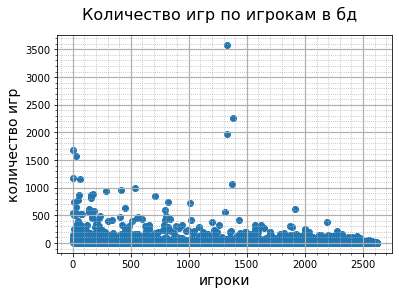

In [3]:
fig, ax = plt.subplots()
fig.suptitle("Количество игр по игрокам в бд", fontsize=16)
ax.set_xlabel("игроки", fontsize=14)
ax.set_ylabel("количество игр", fontsize=14)
ax.minorticks_on()
ax.grid(which="major",linewidth=1.2)
ax.grid(which="minor",linestyle = ':')
ax.scatter(range(len(game_for_player)),game_for_player)
plt.show()

In [4]:
print("больше 100", sum(map(lambda x: x>100,game_for_player)), "шт.")
print("больше 200", sum(map(lambda x: x>200,game_for_player)), "шт.")
print("больше 500", sum(map(lambda x: x>500,game_for_player)), "шт.")

больше 100 238 шт.
больше 200 112 шт.
больше 500 33 шт.


# сколько игр между собой у пары из двух игроков

In [5]:
pdict = {}
part = rwd.table_list("Participation")
stack = [(0,0,0)]
for p in part:
    pid,pid_p,pid_k = p
    last_pop = stack.pop()
    if last_pop[-1] == pid_k:
        a = min(last_pop[1],pid_p)
        b = max(last_pop[1],pid_p)
        if not ((a,b) in pdict.keys()):
            pdict[(a,b)] = []
        pdict[(a,b)].append(pid_k)
    else:
        stack.append(last_pop)
        stack.append(p)
print(len(pdict), "пар игроков")

24829 пар игроков


In [6]:
keys_for_delite = []
for k,v in pdict.items():
    if len(v) == 1:
        keys_for_delite.append(k)
for k in keys_for_delite:
    pdict.pop(k)
print(len(pdict),"пар с количеством игр > 1")

8855 пар с количеством игр > 1


In [7]:
temp_x = list(set(list(map(lambda x:len(x),pdict.values()))))
temp_y = [0]*len(temp_x)
for k,v in pdict.items():
    temp_y[temp_x.index(len(v))] += 1

In [8]:
print(temp_x)
print(temp_y)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 52, 53, 55, 56, 59, 60, 61, 62, 64, 67, 69, 70, 72, 75, 77, 78, 79, 83, 87, 88, 89, 91, 96, 102, 108, 116, 162, 202, 223]
[4230, 1739, 883, 524, 320, 239, 181, 116, 96, 61, 52, 38, 40, 36, 35, 26, 16, 16, 19, 13, 15, 13, 8, 15, 11, 7, 8, 5, 8, 4, 5, 3, 5, 3, 2, 4, 3, 3, 2, 3, 3, 1, 2, 2, 2, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]


In [9]:
print(temp_x.index(52))

48


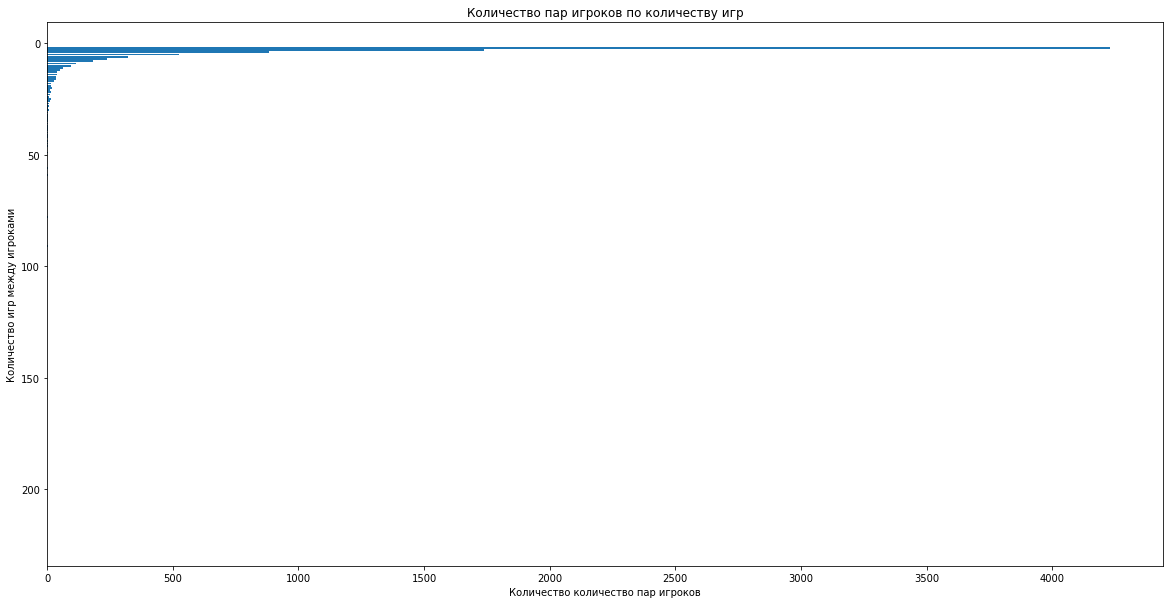

In [10]:
plt.figure(figsize=(20.,10.))
plt.title("Количество пар игроков по количеству игр")
plt.ylabel("Количество игр между игроками")
plt.xlabel("Количество количество пар игроков")
plt.barh(temp_x,temp_y)
plt.gca().invert_yaxis()

# сколько повторений определенной **позиции**

# (o゜▽゜)o☆

In [11]:
import shogi.KIF
import rab_with_db as rwd

In [12]:
kf_list = rwd.table_list("Kifu")
pos_dict = {}

In [13]:
pos_dict.clear()
for i_kifu in range(len(kf_list)):
# for i_kifu in range(10):
    try:
        kif = shogi.KIF.Parser.parse_str(kf_list[i_kifu][1])[0]
        board = shogi.Board()
        for i in range(len(kif['moves'])):
            board.push_usi(kif['moves'][i])
            # pos = board.sfen()[::-1].split(' ',2)[-1][::-1]
            pos = board.sfen()
            if pos in pos_dict.keys():
                pos_dict[pos] += 1
            else:
                pos_dict[pos] = 1
    except Exception as ex:
        print(str(i_kifu), end=' ')

# 7 мин

633 638 1120 4497 4760 6552 7500 9201 9883 9884 9886 11173 12535 12961 13204 13705 16835 18186 25261 26205 26213 29813 29814 29817 40767 40778 43680 

In [14]:
len(pos_dict)

3853813

In [15]:
pos_dict_short = pos_dict.copy()

keys_for_delite = []
for k,v in pos_dict.items():
    if v < 5000:
        keys_for_delite.append(k)

for k in keys_for_delite:
    pos_dict_short.pop(k)

print(len(pos_dict_short))

8


In [16]:
board = shogi.Board()
for p in pos_dict_short:
    board.set_sfen(p)
    print(board.kif_str())

後手の持駒：
  ９ ８ ７ ６ ５ ４ ３ ２ １
+---------------------------+
|v香v桂v銀v金v玉v金v銀v桂v香|一
| ・v飛 ・ ・ ・ ・ ・v角 ・|二
|v歩v歩v歩v歩v歩v歩v歩v歩v歩|三
| ・ ・ ・ ・ ・ ・ ・ ・ ・|四
| ・ ・ ・ ・ ・ ・ ・ ・ ・|五
| ・ ・ 歩 ・ ・ ・ ・ ・ ・|六
| 歩 歩 ・ 歩 歩 歩 歩 歩 歩|七
| ・ 角 ・ ・ ・ ・ ・ 飛 ・|八
| 香 桂 銀 金 玉 金 銀 桂 香|九
+---------------------------+
先手の持駒：
後手の持駒：
  ９ ８ ７ ６ ５ ４ ３ ２ １
+---------------------------+
|v香v桂v銀v金v玉v金v銀v桂v香|一
| ・v飛 ・ ・ ・ ・ ・v角 ・|二
|v歩v歩v歩v歩v歩v歩 ・v歩v歩|三
| ・ ・ ・ ・ ・ ・v歩 ・ ・|四
| ・ ・ ・ ・ ・ ・ ・ ・ ・|五
| ・ ・ 歩 ・ ・ ・ ・ ・ ・|六
| 歩 歩 ・ 歩 歩 歩 歩 歩 歩|七
| ・ 角 ・ ・ ・ ・ ・ 飛 ・|八
| 香 桂 銀 金 玉 金 銀 桂 香|九
+---------------------------+
先手の持駒：
後手の持駒：
  ９ ８ ７ ６ ５ ４ ３ ２ １
+---------------------------+
|v香v桂v銀v金v玉v金v銀v桂v香|一
| ・v飛 ・ ・ ・ ・ ・v角 ・|二
|v歩v歩v歩v歩v歩v歩 ・v歩v歩|三
| ・ ・ ・ ・ ・ ・v歩 ・ ・|四
| ・ ・ ・ ・ ・ ・ ・ ・ ・|五
| ・ ・ 歩 ・ ・ ・ ・ 歩 ・|六
| 歩 歩 ・ 歩 歩 歩 歩 ・ 歩|七
| ・ 角 ・ ・ ・ ・ ・ 飛 ・|八
| 香 桂 銀 金 玉 金 銀 桂 香|九
+---------------------------+
先手の持駒：
後手の持駒：
  ９ ８ ７ ６ ５ ４ ３ ２ １
+---------------------------+
|v香v桂v銀v金v玉v金v銀v桂v香|一
| ・v飛 ・ ・ ・ ・ ・v角 ・|二
|v歩v歩v歩v歩v歩v歩v歩v歩v歩|三
|

# Матрица побед/игр на тех, у кого много игр. Пронормировать. Упорядочить.

In [17]:
import pandas as pd

In [18]:
index = []
for k,v in pdict.items():
    if len(v) > 50:
        index.append(k[0])
        index.append(k[1])
        # print(k[0],k[1])
index = list(set(index))
print(len(index))
index.sort()

40


In [29]:
matr = pd.DataFrame(data=np.zeros((len(index),len(index))),
                    index=index,
                    columns=index,
                    dtype=int)

matr['Total'] = [0] * len(index)

In [30]:
elo = [1200] * len(index)
K1 = 40 # < 2300
K2 = 20 # x < 2400
K3 = 10 # > 2400
Sb = 0
Sw = 0

In [31]:
for k,v in pdict.items():
    if len(v) > 50:
        i = index.index(k[0])
        j = index.index(k[1])       
        i_win = 0
        j_win = 0
        for kifu_game in v:
            try:
                kif_ind = [a for a,b in enumerate(kf_list) if b[0] == kifu_game][0]
                kif = shogi.KIF.Parser.parse_str(kf_list[kif_ind][1])[0]
                win_b = ''
                win_w = ''
                for ind, login in player_table:
                    if login == kif['names'][shogi.BLACK]:
                        win_b = ind
                    if login == kif['names'][shogi.WHITE]:
                        win_w = ind
                Eb = 1.0 / (1+pow(10,(elo[index.index(win_b)]-elo[index.index(win_w)])/400))
                Ew = 1.0 / (1+pow(10,(elo[index.index(win_w)]-elo[index.index(win_b)])/400))
                if kif['win'] == 'b':
                    if k[0] == win_b:
                        i_win += 1
                        Sb = 1
                        Sw = 0
                    elif k[1] == win_b:
                        j_win += 1
                        Sb = 1
                        Sw = 0
                    else:
                        i_win += 0.5
                        j_win += 0.5
                        Sb = 0.5
                        Sw = 0.5
                else:
                    if k[0] == win_w:
                        i_win += 1
                        Sw = 1
                        Sb = 0
                    elif k[1] == win_w:
                        j_win += 1
                        Sw = 1
                        Sb = 0
                    else:
                        i_win += 0.5
                        j_win += 0.5
                        Sb = 0.5
                        Sw = 0.5
                if elo[index.index(win_b)] <= 2300:
                    elo[index.index(win_b)] += K1*(Sb - Eb)
                    print(K1*(Sb - Eb))
                elif elo[index.index(win_b)] <= 2400:
                    elo[index.index(win_b)] += K2*(Sb - Eb)
                    print(K2*(Sb - Eb))
                elif elo[index.index(win_b)] > 2400:
                    elo[index.index(win_b)] += K3*(Sb - Eb)
                    print(K3*(Sb - Eb))
                if elo[index.index(win_w)] <= 2300:
                    elo[index.index(win_w)] += K1*(Sw - Ew)
                    print(K1*(Sw - Ew))
                elif elo[index.index(win_w)] <= 2400:
                    elo[index.index(win_w)] += K2*(Sw - Ew)
                    print(K2*(Sw - Ew))
                elif elo[index.index(win_w)] > 2400:
                    elo[index.index(win_w)] += K3*(Sw - Ew)
                    print(K3*(Sw - Ew))
            except Exception as ex:
                # print(str(i_kifu), end=' ')
                pass
        matr.iloc[i,j] += i_win
        matr.iloc[j,i] += j_win
        matr.iloc[i,-1] += i_win + j_win
        matr.iloc[j,-1] += i_win + j_win

20.0
-20.0
-22.29246535049171
22.29246535049171
15.224870482300673
-15.224870482300672
-16.90870428130697
16.90870428130697
21.16825406313634
-21.16825406313634
16.431923757828493
-16.43192375782849
-18.28931458520352
18.28931458520352
-19.609290237175223
19.609290237175223
-18.138559466183708
18.138559466183708
-19.778573708068297
19.778573708068294
-17.951551301355476
17.951551301355476
-20.01109161058281
20.01109161058281
-22.304670559817062
22.304670559817072
-15.211884030743283
15.211884030743281
-16.893801942639055
16.89380194263905
18.81482015979296
-18.81482015979295
-20.978783612591197
20.978783612591197
16.63739507484788
-16.637395074847877
21.47669472792705
-21.47669472792705
-23.901338051132257
23.901338051132257
-26.463463480403075
26.463463480403075
-10.955046847703898
10.955046847703901
-28.0136203020313
28.0136203020313
30.536197850526364
-30.53619785052637
-32.83919016153128
32.83919016153128
-34.800524449867495
34.80052444986749
36.36081039553447
-36.36081039553448
-2

In [32]:
total_by_rows = []
for i in range(len(index)):
    res = round(sum(matr.iloc[i,:-1])/matr.iloc[i,-1],4)
    total_by_rows.append(res * 100)

matr['Percentage'] = total_by_rows
matr['Elo'] = list(map(lambda x:round(x),elo))

In [33]:
matr

,1,7,9,29,50,66,76,142,159,162,...,1432,1438,1785,2032,2191,2239,2248,Total,Percentage,Elo
1,0,0,0,0,0,0,0,0,43,0,...,0,0,0,0,0,0,0,83,51.81,2487
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,180,71.67,-810
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,77,62.34,2506
29,0,0,0,0,0,48,0,0,0,0,...,0,0,0,0,0,0,0,78,61.54,2444
50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,55,5.45,-779
66,0,0,0,30,0,0,0,0,0,40,...,0,0,0,0,0,0,0,296,52.36,-3984
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,87,37.93,-793
142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,52,40.38,306
159,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,83,48.19,-377
162,0,0,0,0,0,16,0,0,0,0,...,0,0,0,0,0,0,0,56,28.57,1840
